# Wine Quality

This analysis aimed to explore the impact of chemical features such as acidity, alcohol content, and sugar levels on wine quality, while also addressing critical topics like feature importance, class imbalance, and model prediction accuracy.

The model used here (Random Forest) helps answer questions regarding the most important predictors of wine quality. The visualizations provided (boxplots, heatmaps, and feature importance plots) are valuable tools for exploring and interpreting these relationships.

### Dataset Overview

The Wine Quality Dataset contains the following attributes:

**Input Features:**
- `fixed acidity`: Acid content in wine
- `volatile acidity`: The amount of acetic acid in wine, which affects its taste
- `citric acid`: A component that contributes to wine's acidity
- `residual sugar`: The amount of sugar left after fermentation
- `chlorides`: Salt content in wine
- `free sulfur dioxide`: Amount of free sulfur dioxide
- `total sulfur dioxide`: Total sulfur dioxide in wine
- `density`: Density of the wine (density of water = 1)
- `pH`: pH level of the wine
- `sulphates`: Sulphate content, contributes to wine's aroma
- `alcohol`: Alcohol content in the wine

### Step 1: Import Libraries

In [1]:
import zipfile
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### Step 2: Read Data

In [2]:
# Define file paths
zip_file_path = 'Wine Quality Dataset.zip'
extracted_folder = 'Wine_Quality_Data'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Load the Wine Quality CSV into a DataFrame
csv_file_name = os.path.join(extracted_folder, 'WineQT.csv')
df = pd.read_csv(csv_file_name)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Step 3: Data Exploration

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [5]:
# Check for missing values and impute if necessary
if df.isnull().sum().any():
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
else:
    df_imputed = df

In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### Key Findings

- Most wines in the dataset have moderate levels of acidity, alcohol, and sugar.
- Quality scores are predominantly in the middle range (around 5 to 6).
- Free and total sulfur dioxide levels are variable but generally higher than the minimum values, indicating that sulfur dioxide is commonly used to preserve the wine.
- Alcohol content ranges from 8.4% to 14%, with most wines falling between 9.5% and 11.1%.
- Fixed acidity shows variability, with the bulk of wines having a level between 7 and 9.
- Residual sugar varies more widely than other features, suggesting that sweetness levels can differ significantly.

### Step 4: Data Preprocessing

In [6]:
# Define the features (X) and target (y)
X = df_imputed.drop(['quality', 'Id'], axis=1)  # Drop 'quality' and 'Id' columns
y = df_imputed['quality']  # Target column (quality of the wine)

The StandardScaler is applied to normalize the features before training the model. This ensures that all features are on the same scale and allows the model to learn more effectively, improving its performance.

In [7]:
# Normalize the numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # This will normalize the features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

SMOTE is used to address class imbalance by resampling the underrepresented classes, which helps improve the model's predictive performance.

In [8]:
# Handle class imbalance using SMOTE
print(f"Class distribution before SMOTE: {y_train.value_counts()}")
if y_train.value_counts().min() < 0.1 * len(y_train):
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
else:
    X_train_res, y_train_res = X_train, y_train

Class distribution before SMOTE: quality
5    387
6    363
7    117
4     27
8     14
3      6
Name: count, dtype: int64


C:\Users\milto\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


**Can we predict wine quality with a high degree of accuracy?**

The Random Forest model is trained using the chemical features (e.g., alcohol, pH, sulfur dioxide) and predicts wine quality. The classification report provides the accuracy and performance of the model in predicting wine quality based on these features.

In [9]:
# Model training: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

# Classification report
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.73      0.73      0.73        96
           6       0.64      0.55      0.59        99
           7       0.51      0.77      0.62        26
           8       0.00      0.00      0.00         2

    accuracy                           0.63       229
   macro avg       0.31      0.34      0.32       229
weighted avg       0.64      0.63      0.63       229



C:\Users\milto\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\milto\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\milto\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Interpretation

- **Class Imbalance**: The model is struggling with rare classes like "3", "4", and "8" due to their low support in the dataset. This leads to poor performance in terms of precision and recall for these classes.
- **Better Performance for Class 5**: The model performs best for class "5", with a good balance between precision and recall, likely due to the larger number of instances in this class.
- **Challenges with Outliers/Underrepresented Classes**: The model may not be handling rare or outlier classes effectively. This is common in imbalanced datasets, where the model may overfit to the majority class and underperform on smaller classes.
- **Possible Improvements**: You could try using techniques like oversampling (e.g., SMOTE), undersampling, or class weights in the model to address the class imbalance and improve performance for the minority classes.

### Step 5: Visualizations

**How does alcohol content affect wine quality?**

The code generates a boxplot of alcohol vs. wine quality, which shows the distribution of alcohol levels across different quality ratings. This helps assess if higher alcohol content is associated with better wine quality.

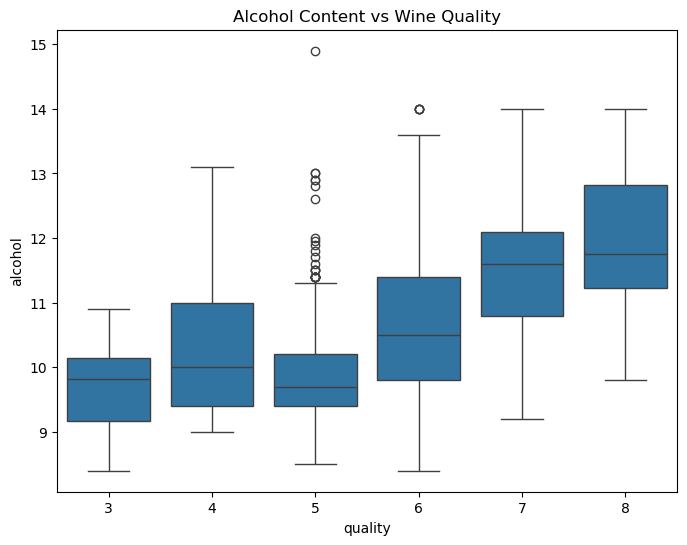

In [10]:
## 1. Alcohol Content vs Wine Quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=df_imputed)
plt.title("Alcohol Content vs Wine Quality")
plt.show()

**How does acidity (fixed, volatile, and citric acid) affect wine quality?**

The code generates boxplots for different types of acidity (fixed acidity, volatile acidity, citric acid) and their relationship with wine quality. This allows you to investigate whether higher acidity levels are associated with better or poorer quality wines.    

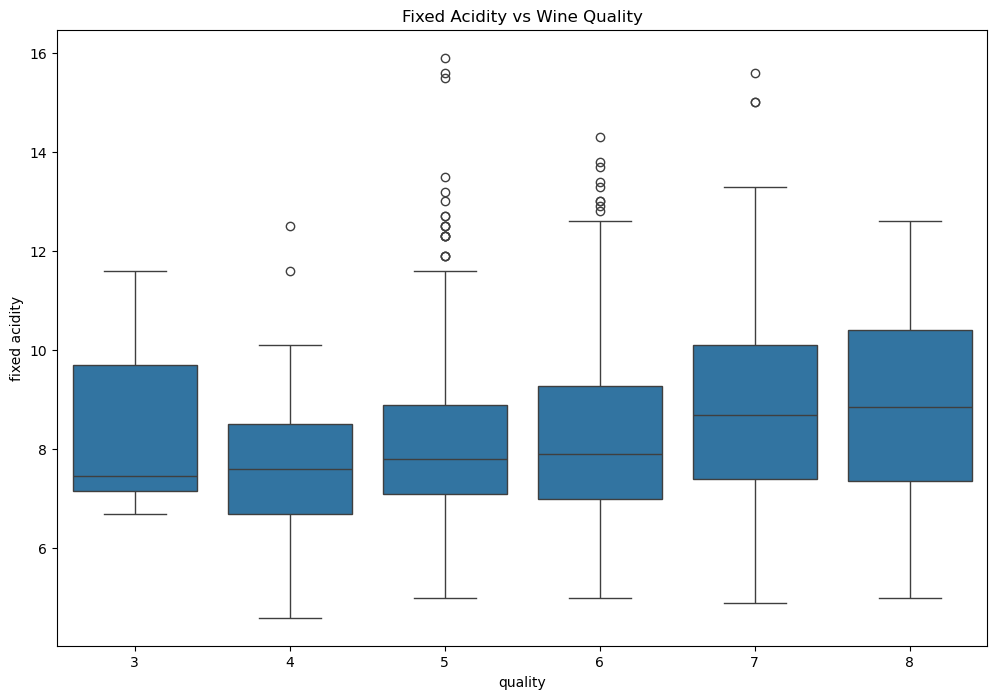

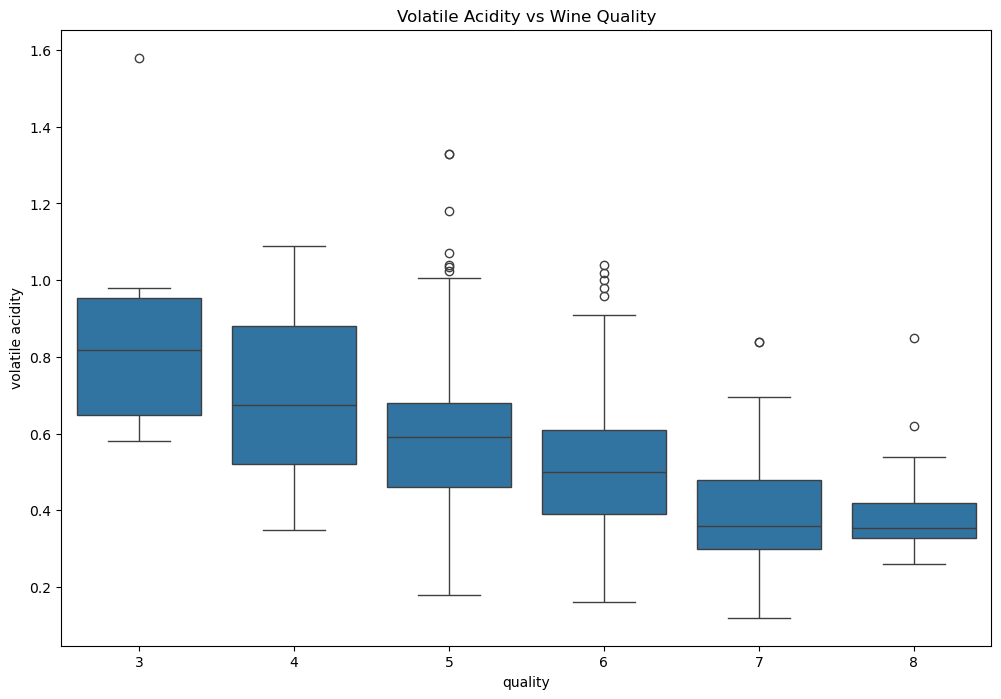

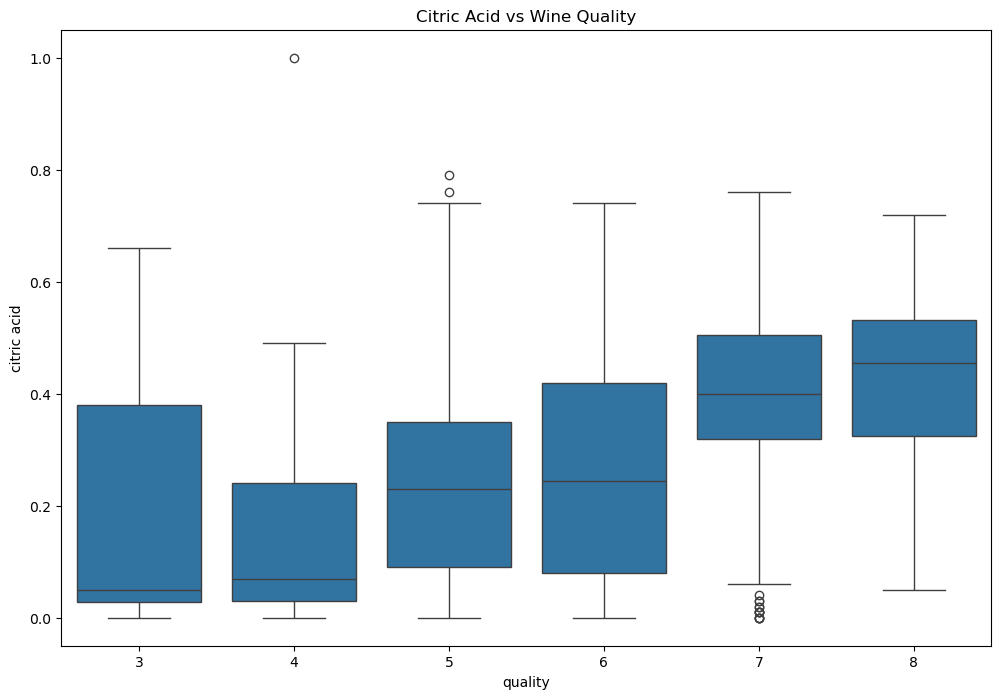

In [11]:
## 2. Acidity vs Wine Quality
# Fixed acidity
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='fixed acidity', data=df_imputed)
plt.title("Fixed Acidity vs Wine Quality")
plt.show()

# Volatile acidity
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='volatile acidity', data=df_imputed)
plt.title("Volatile Acidity vs Wine Quality")
plt.show()

# Citric acid
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='citric acid', data=df_imputed)
plt.title("Citric Acid vs Wine Quality")
plt.show()

**Does the amount of residual sugar influence wine quality ratings?**

The code generates a boxplot for residual sugar vs. wine quality, allowing you to analyze how sugar content relates to wine quality and if there is an optimal sugar level for high-quality wines.

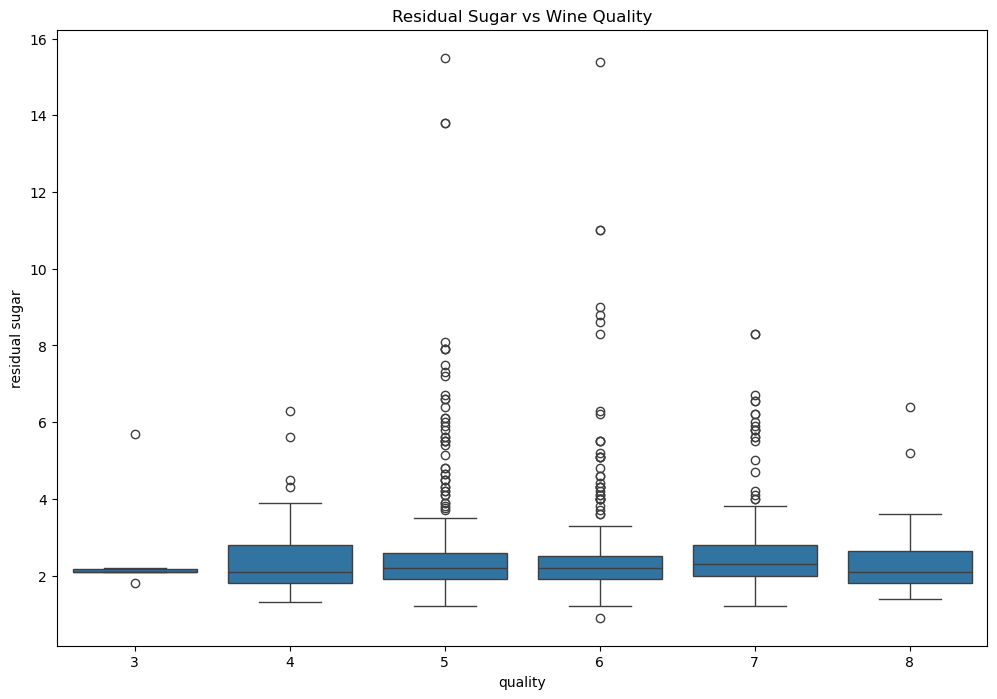

In [12]:
## 3. Residual Sugar vs Wine Quality
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='residual sugar', data=df_imputed)
plt.title("Residual Sugar vs Wine Quality")
plt.show()

**How does the density of the wine relate to its quality?**

A boxplot of density vs. wine quality is included, which allows you to examine how density correlates with wine quality. Density could indicate sugar and alcohol content, which are crucial in determining wine quality.

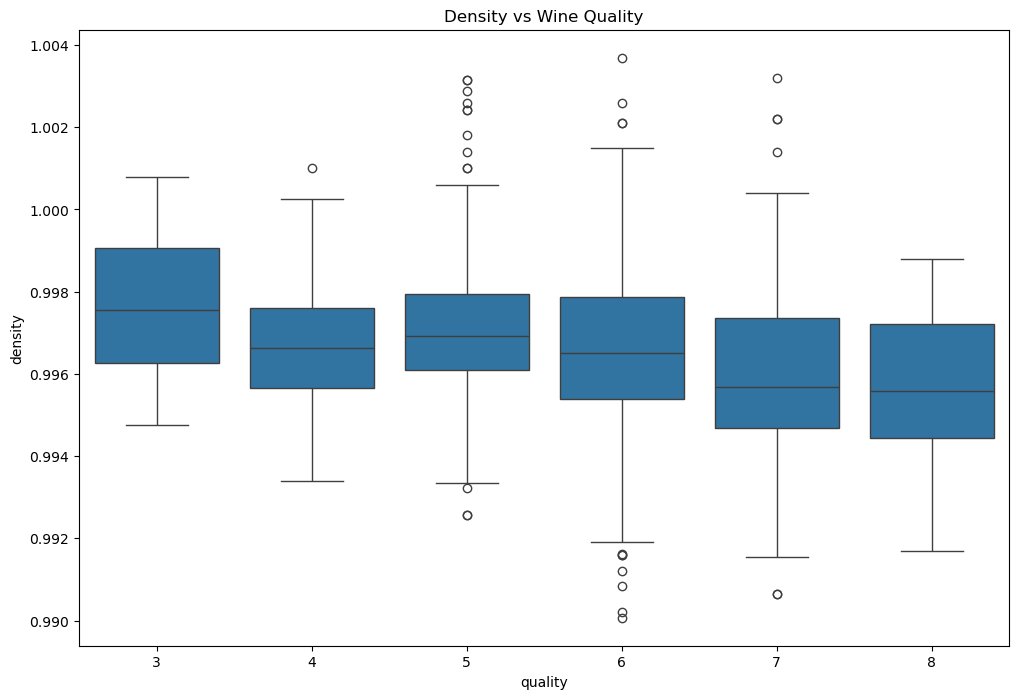

In [13]:
## 4. Density vs Wine Quality
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='density', data=df_imputed)
plt.title("Density vs Wine Quality")
plt.show()

**How balanced is the wine quality distribution?**

The countplot visualizes the distribution of wine quality ratings in the dataset. This helps assess whether the quality classes are balanced or if certain classes (e.g., excellent, poor) are underrepresented.

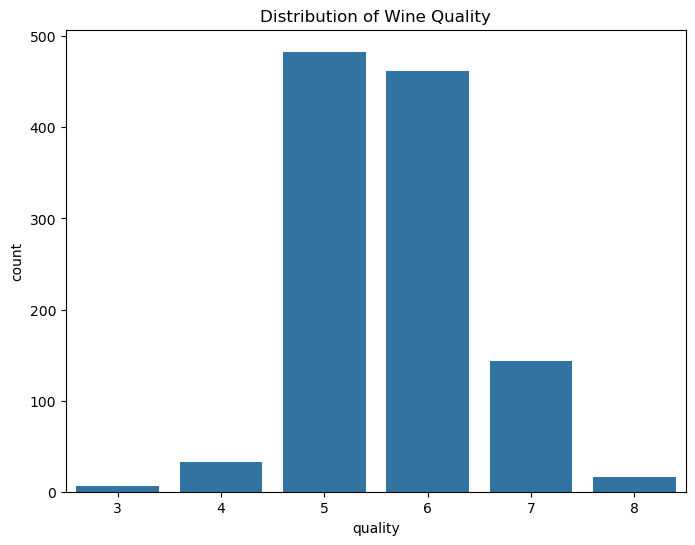

In [14]:
## 5. Wine Quality Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df_imputed)
plt.title("Distribution of Wine Quality")
plt.show()

**What are the most important features for predicting wine quality?**

The Random Forest model computes feature importance, and the bar chart visualization (feature_importance.sort_values().plot(kind='bar')) identifies which features contribute the most to predicting wine quality.

In [15]:
## 6. Feature Importance using Random Forest
# Use Random Forest to determine feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

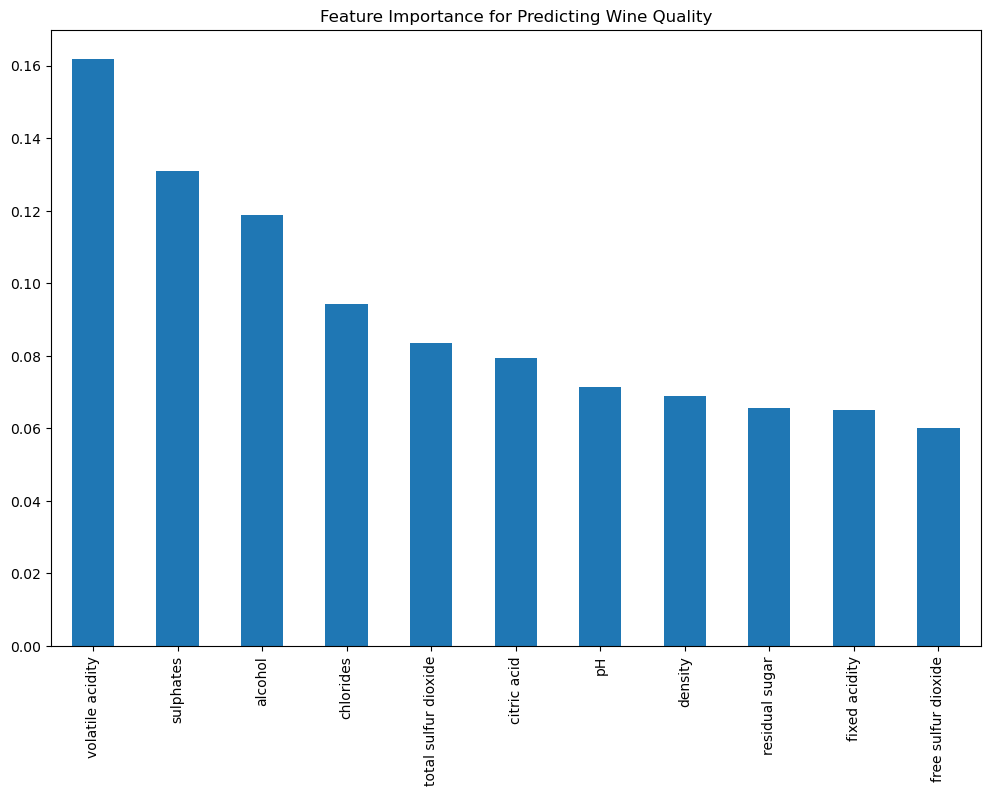

In [16]:
# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance for Predicting Wine Quality")
plt.show()

### Step 6: Correlation Heatmap of Features

**What are the main factors influencing wine quality?**

The correlation heatmap (sns.heatmap) visualizes the relationships between all features (e.g., alcohol, acidity, sulfur dioxide, etc.) and helps identify the strongest relationships with the quality variable.

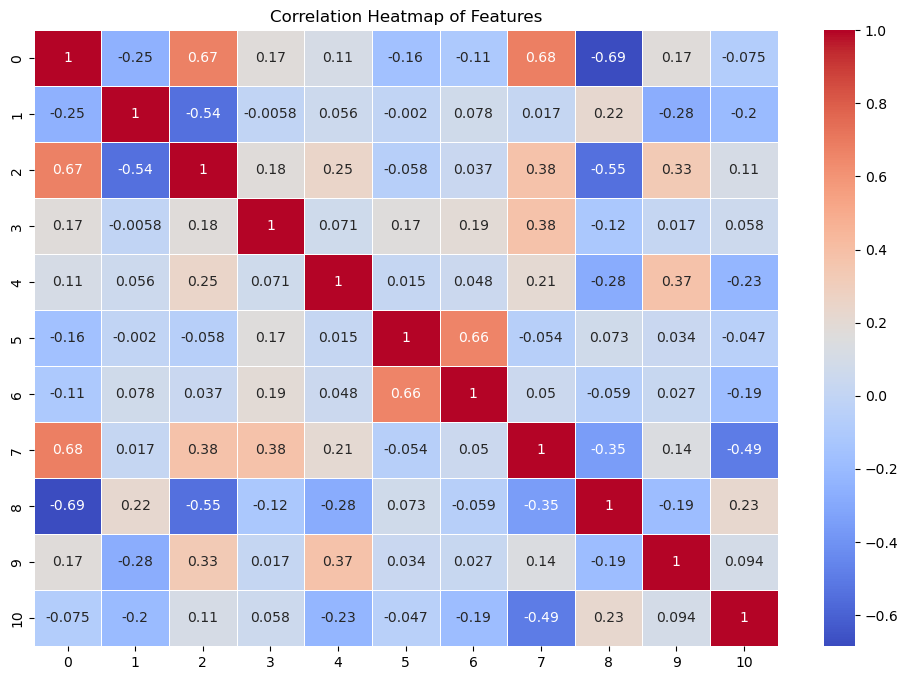

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_scaled).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

#### Key Findings

- **Variables 0 and 8 (-0.685163)**: These two variables have a strong negative correlation. As one variable increases, the other tends to decrease. This suggests that these features are inversely related, and it would be important to explore why this is the case.

- **Variables 7 and 10 (-0.494727)**: There is also a moderate negative correlation here. As one variable increases, the other tends to decrease.

## Conclusion

he dataset reveals that most wines in the study exhibit moderate levels of acidity, alcohol, and sugar, with quality scores predominantly in the middle range (5-6). Alcohol content is found to vary between 8.4% and 14%, with most wines clustered between 9.5% and 11.1%. These characteristics suggest that the wines in this dataset are relatively balanced in terms of their chemical composition, which is reflected in their average quality scores. Interestingly, free and total sulfur dioxide levels show significant variation but remain mostly higher than their minimum values, indicating the widespread use of sulfur dioxide as a preservative.

Residual sugar, in particular, stands out as a feature with greater variability, suggesting that sweetness plays a more diverse role in wine styles. Additionally, fixed acidity levels range mostly between 7 and 9, highlighting a common profile across the wines, though some variation is still present.

However, when considering model performance, challenges related to class imbalance become apparent. The model struggles with predicting rare classes, particularly for wines rated as "3", "4", or "8", due to the limited number of instances in these categories. This leads to poor precision and recall for these classes. In contrast, the model performs better for the majority class, "5", where a balance between precision and recall is more easily achieved due to the higher frequency of observations in this group. To improve the model's performance for underrepresented classes, techniques such as oversampling (e.g., SMOTE), undersampling, or adjusting class weights could be explored to address the imbalance.

Additionally, examining feature correlations uncovers some interesting insights. Variables 0 and 8 show a strong negative correlation of -0.685, indicating an inverse relationship between these two features, which warrants further exploration to understand the underlying dynamics. Similarly, variables 7 and 10 exhibit a moderate negative correlation (-0.495), suggesting that these features may also influence each other in a complementary way.

### Limitation of the Model

While the model provides valuable insights into the factors influencing wine quality, it faces challenges with rare classes and outlier values. Addressing class imbalance through data resampling or class weighting, along with further investigation into feature interactions, would be crucial steps toward improving the model’s performance and ensuring a more accurate prediction of wine quality.